# Еще одна кластеризация и еще одна самостоятельная работа


### Кластеризация политических режимов

У нас имеется датасет, содержащий данные о странах и теория, что все страны можно отнести к одному из четырех видов, так называемая теория Даля. Попробуйте применить ее на практике и постараться выделить 4 кластера в данных по политическому устройству стран. Подробнее прочитать про датасет можно по [ссылке](https://www3.nd.edu/~mcoppedg/crd/Codebook.doc).

Импортируем модуль pandas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

Загрузим наш датасет и посмотрим что находится внутри.

In [2]:
data = pd.read_csv('DahlDims.csv')
data.head()

,cname,abbr,year,yr,CONTEST,INCLUS,CONTESTstd,INCLUSstd,ContestationA,INCLUSA,...,ALTINF,POLY,ccode,ccodecow,ccodealp,ccodewb,f1mean,f2mean,f1sd,f2sd
0,Afghanistan,AFGN,1950,50,-1.150339342,-1.013598554,-1.011842735,-0.741150814,-1.150339342,-1.013598554,...,,,4,700,AFG,AFG,0.15,0.09,1.01,0.82
1,Afghanistan,AFGN,1951,51,-1.109144219,-0.956002727,-0.990235662,-0.790842427,-1.109144219,-0.956002727,...,,,4,700,AFG,AFG,0.13,0.06,1.01,0.89
2,Afghanistan,AFGN,1952,52,-1.106897206,-0.839698187,-1.011173094,-0.804507241,-1.106897206,-0.839698187,...,,,4,700,AFG,AFG,0.14,0.01,1.04,0.97
3,Afghanistan,AFGN,1953,53,-1.104317508,-0.675316224,-1.018490208,-0.547784602,-1.104317508,-0.675316224,...,,,4,700,AFG,AFG,0.13,0.06,1.04,0.90
4,Afghanistan,AFGN,1954,54,-1.107440167,-0.497937884,-1.061737774,-0.453082232,-1.107440167,-0.497937884,...,,,4,700,AFG,AFG,0.09,0.01,1.04,0.93


В нашем датасете есть 28 колонок, но работать мы будем с 2 из них. Это колонки CONTEST и INCLUS.
Строить мы будем распределение стран по этим параметрам за определенные год, например за 2000.

### Задание 1. (0.5 балла). Сохраните отдельно наблюдения за 2000 год

In [3]:
data_2000 = data[data['year'] == 2000]
data_2000.head()

,cname,abbr,year,yr,CONTEST,INCLUS,CONTESTstd,INCLUSstd,ContestationA,INCLUSA,...,ALTINF,POLY,ccode,ccodecow,ccodealp,ccodewb,f1mean,f2mean,f1sd,f2sd
50,Afghanistan,AFGN,2000,2000,-1.860250763,-3.632547535,-1.177129448,-1.956969586,,,...,,,4,700,AFG,AFG,0.525,0.495,0.915,0.675
101,Albania,ALBN,2000,2000,-0.055792334,0.529475222,0.473950014,0.852395775,,,...,,,8,339,ALB,ALB,0.525,0.495,0.915,0.675
140,Algeria,ALGR,2000,2000,-1.021945168,0.513831312,-0.410079829,0.841836136,,,...,,,12,615,DZA,DZA,0.525,0.495,0.915,0.675
191,Andorra,ANDO,2000,2000,0.400964891,-0.173187886,0.891882876,0.378098177,,,...,,,20,232,AND,ADO,0.525,0.495,0.915,0.675
217,Angola,ANGL,2000,2000,-1.36415187,-0.021909254,-0.723198961,0.480211254,,,...,,,24,540,AGO,AGO,0.525,0.495,0.915,0.675


### Задание 2. (0.5 балла). Сколько всего стран представлено для 2000 года?

In [4]:
print(f'{len(np.unique(data_2000.cname))} страны представлены для 2000 года')

192 страны представлены для 2000 года


### Задание 3. (0.5 балла). Переведите признаки INCLUS и CONTEST в числовой вид.

In [5]:
data_2000.INCLUS = data_2000.INCLUS.astype(float)
data_2000.CONTEST = data_2000.CONTEST.astype(float)
data_2000.INCLUS.info()
data_2000.CONTEST.info()

<class 'pandas.core.series.Series'>
Index: 192 entries, 50 to 7562
Series name: INCLUS
Non-Null Count  Dtype  
--------------  -----  
192 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB
<class 'pandas.core.series.Series'>
Index: 192 entries, 50 to 7562
Series name: CONTEST
Non-Null Count  Dtype  
--------------  -----  
192 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


### Задание 4. (1 балл). Постройте график, где на оси X у нас колонка INCLUS, а по y - CONTEST

<Axes: xlabel='INCLUS', ylabel='CONTEST'>

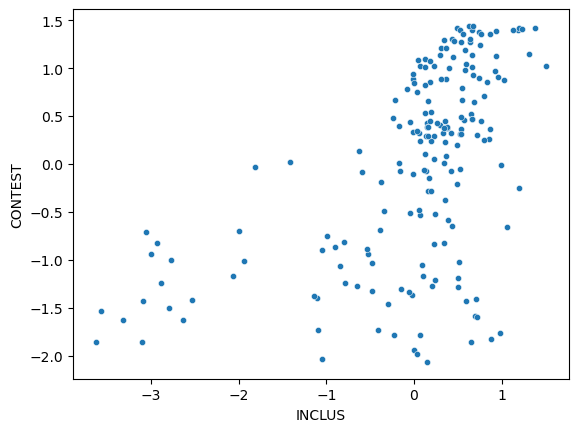

In [6]:
sns.scatterplot(x = data_2000.INCLUS, y = data_2000.CONTEST, s = 20)

### Кластеризация с помощью KMeans

Кластеризатор KMeans разбивает множество элементов векторного пространства на заранее известное число кластеров k. Он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Алгоритм завершается, когда на какой-то итерации не происходит изменения внутрикластерного расстояния. Это происходит за конечное число итераций, так как количество возможных разбиений конечного множества конечно, а на каждом шаге суммарное квадратичное отклонение V уменьшается, поэтому зацикливание невозможно.

Импортируем модуль KMeans из sklearn.

In [7]:
from sklearn.cluster import KMeans

### Задание 5. (2,5 балла). Возьмите два признака: INCLUS и CONTEST и обучите кластеризатор для 4 кластеров (как сказано в теории)

In [8]:
X = data_2000[['INCLUS', 'CONTEST']]

In [9]:
kmeans = KMeans(n_clusters = 4)
model = kmeans.fit(X)

# Из любопытства посмотрим, сколько значений в каждой группе кластеров
labels = pd.Series(model.labels_)
labels.value_counts()

0    74
3    58
2    43
1    17
Name: count, dtype: int64

Посмотрим как наши данные пометились.

In [10]:
kmeans.labels_

array([1, 0, 2, 0, 2, 0, 3, 0, 3, 3, 2, 0, 1, 0, 0, 2, 3, 0, 3, 2, 3, 0,
       3, 3, 1, 0, 2, 1, 2, 2, 3, 0, 0, 2, 3, 2, 0, 1, 1, 2, 3, 0, 0, 2,
       3, 3, 3, 0, 0, 3, 0, 2, 3, 2, 2, 3, 0, 2, 3, 3, 2, 2, 0, 3, 0, 3,
       0, 0, 0, 2, 3, 0, 3, 3, 3, 0, 0, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 0,
       2, 3, 1, 2, 2, 3, 0, 0, 2, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 3, 0, 3, 0, 3, 2, 0, 1, 0, 0, 0, 3, 3, 3, 0, 0, 3, 1, 1, 0, 3,
       3, 0, 0, 0, 3, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 3, 3, 0,
       1, 3, 3, 0, 0, 0, 0, 2, 0, 2, 3, 3, 2, 3, 2, 0, 0, 0, 2, 1, 3, 2,
       0, 2, 0, 2, 0, 1, 3, 3, 3, 2, 0, 0, 2, 2, 0, 2], dtype=int32)

Всем нашим данным были присвоены лейблы от 0 до 3.

Создадим новый Датафрейм, в который поместим столбцы INCLUS, CONTEST и новый столбец Labels в котором мы будем хранить помеченные кластерезатором данные.

In [11]:
draw = pd.DataFrame({'INCLUS': X.INCLUS,
                   'CONTEST': X.CONTEST,
                   'Labels': kmeans.labels_})

len(np.unique(draw.Labels)) # Проверяем нет ли ошибки

4

Теперь давайте построим тот же график что и в начале, но уже с окраской кластеров. Для этого используем seaborn.

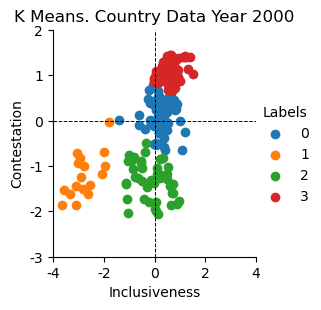

In [12]:
sns.FacetGrid(draw, hue="Labels").map(plt.scatter, "INCLUS", "CONTEST").add_legend()

plt.title('K Means. Country Data Year 2000')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.yticks((-3,-2,-1,0,1,2), ("-3","-2","-1","0","1","2"))
plt.xticks((-4,-2,0,2,4), ("-4","-2","0","2","4"))
plt.axvline(x=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.axhline(y=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.show()

### Задание 6. (2,5 балла). С помощью любого известного Вам способа (мы их знаем всего 2) найдите оптимальное количество кластеров с математической точки зрения. Обучите кластеризатор для этой ситуации. Визуализируйте результат

<Axes: xlabel='cluster', ylabel='silhouette'>

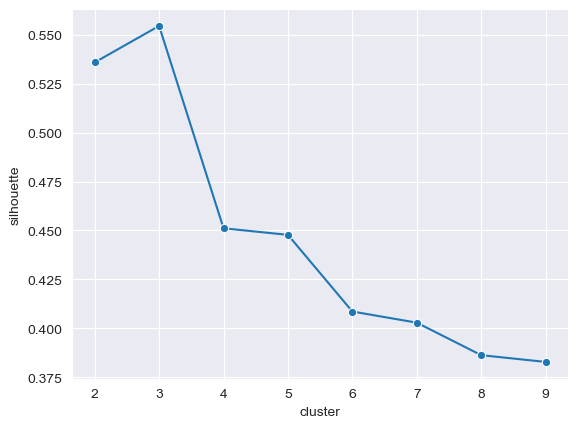

In [13]:
def get_silhouette(cluster_num, X): 
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
silhouette_df = pd.DataFrame(silhouette_res)

sns.set_style("darkgrid")
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [14]:
kmeans = KMeans(n_clusters = 3)
model = kmeans.fit(X)

# Из любопытства посмотрим, сколько значений в каждой группе кластеров
labels = pd.Series(model.labels_)
labels.value_counts()

0    119
2     56
1     17
Name: count, dtype: int64

In [15]:
kmeans.labels_

array([1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2,
       0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2], dtype=int32)

In [16]:
draw_3 = pd.DataFrame({'INCLUS': X.INCLUS,
                   'CONTEST': X.CONTEST,
                   'Labels': kmeans.labels_})

len(np.unique(draw_3.Labels)) # Проверяем нет ли ошибки

3

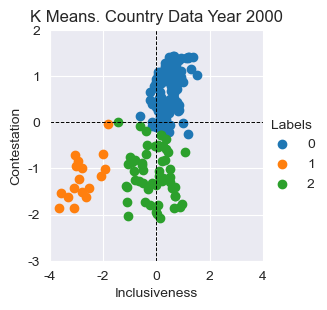

In [17]:
sns.FacetGrid(draw_3, hue="Labels").map(plt.scatter, "INCLUS", "CONTEST").add_legend()

plt.title('K Means. Country Data Year 2000')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.yticks((-3,-2,-1,0,1,2), ("-3","-2","-1","0","1","2"))
plt.xticks((-4,-2,0,2,4), ("-4","-2","0","2","4"))
plt.axvline(x=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.axhline(y=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.show()

### Задание 7. (2,5 балла). Повторите все то же самое для 1950 года. Произошли ли какие-то изменения?

In [18]:
data_1950 = data[data['year'] == 1950]
data_1950.head()

,cname,abbr,year,yr,CONTEST,INCLUS,CONTESTstd,INCLUSstd,ContestationA,INCLUSA,...,ALTINF,POLY,ccode,ccodecow,ccodealp,ccodewb,f1mean,f2mean,f1sd,f2sd
0,Afghanistan,AFGN,1950,50,-1.150339342,-1.013598554,-1.011842735,-0.741150814,-1.150339342,-1.013598554,...,,,4,700,AFG,AFG,0.15,0.09,1.01,0.82
51,Albania,ALBN,1950,50,-1.188960776,0.959032625,-1.050850384,0.876406753,-1.188960776,0.959032625,...,,,8,339,ALB,ALB,0.15,0.09,1.01,0.82
141,Andorra,ANDO,1950,50,0,0,0.15,0.09,0,0,...,,,20,232,AND,ADO,0.15,0.09,1.01,0.82
238,Argentina,ARGN,1950,50,-0.316937701,0.418327978,-0.170107078,0.433028942,-0.316937701,0.418327978,...,,,32,160,ARG,ARG,0.15,0.09,1.01,0.82
301,Australia,AUSL,1950,50,1.362703768,0.870069914,1.526330806,0.803457329,1.362703768,0.870069914,...,,,36,900,AUS,AUS,0.15,0.09,1.01,0.82


In [19]:
print(f'{len(np.unique(data_1950.cname))} стран представлены для 1950 года')

86 стран представлены для 1950 года


In [20]:
data_1950.INCLUS = data_1950.INCLUS.astype(float)
data_1950.CONTEST = data_1950.CONTEST.astype(float)
data_1950.INCLUS.info()
data_1950.CONTEST.info()

<class 'pandas.core.series.Series'>
Index: 86 entries, 0 to 7448
Series name: INCLUS
Non-Null Count  Dtype  
--------------  -----  
86 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB
<class 'pandas.core.series.Series'>
Index: 86 entries, 0 to 7448
Series name: CONTEST
Non-Null Count  Dtype  
--------------  -----  
86 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


<Axes: xlabel='INCLUS', ylabel='CONTEST'>

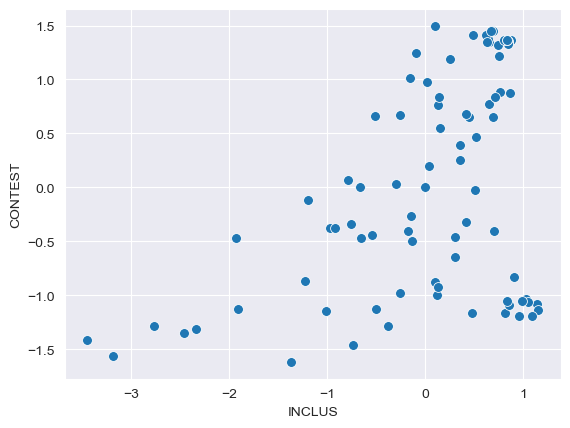

In [21]:
sns.scatterplot(x = data_1950.INCLUS, y = data_1950.CONTEST, s = 50)

In [22]:
X_1950 = data_1950[['INCLUS', 'CONTEST']]
X_1950.head()

,INCLUS,CONTEST
0,-1.013599,-1.150339
51,0.959033,-1.188961
141,0.000000,0.000000
238,0.418328,-0.316938
301,0.870070,1.362704


In [23]:
kmeans = KMeans(n_clusters = 4)
model = kmeans.fit(X_1950)

# Из любопытства посмотрим, сколько значений в каждой группе кластеров
labels = pd.Series(model.labels_)
labels.value_counts()

1    36
3    22
0    20
2     8
Name: count, dtype: int64

In [24]:
kmeans.labels_

array([3, 0, 3, 0, 1, 1, 1, 2, 3, 1, 0, 1, 1, 2, 3, 1, 1, 0, 1, 0, 1, 3,
       0, 3, 1, 1, 0, 1, 1, 1, 0, 3, 0, 1, 1, 3, 3, 2, 1, 1, 1, 1, 3, 0,
       0, 1, 0, 3, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 3, 3, 0, 3, 3, 1, 0, 3,
       0, 3, 2, 1, 2, 1, 1, 1, 3, 0, 0, 1, 1, 1, 1, 0, 2, 3, 2, 0],
      dtype=int32)

In [25]:
draw_1950 = pd.DataFrame({'INCLUS': X_1950.INCLUS,
                   'CONTEST': X_1950.CONTEST,
                   'Labels': kmeans.labels_})

len(np.unique(draw_1950.Labels)) # Проверяем нет ли ошибки

4

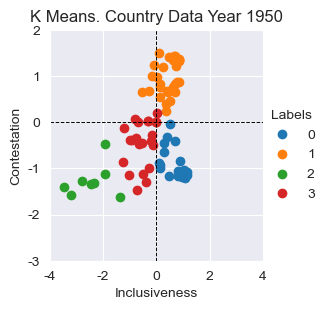

In [26]:
sns.FacetGrid(draw_1950, hue="Labels").map(plt.scatter, "INCLUS", "CONTEST").add_legend()

plt.title('K Means. Country Data Year 1950')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.yticks((-3,-2,-1,0,1,2), ("-3","-2","-1","0","1","2"))
plt.xticks((-4,-2,0,2,4), ("-4","-2","0","2","4"))
plt.axvline(x=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.axhline(y=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.show()

<Axes: xlabel='cluster', ylabel='silhouette'>

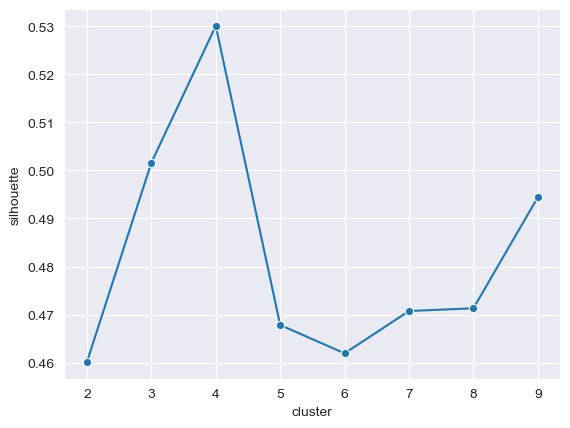

In [27]:
def get_silhouette(cluster_num, X): 
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X_1950)
    silhouette = silhouette_score(X_1950, k_means.predict(X_1950))
    return silhouette

silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X_1950))
    silhouette_res["cluster"].append(cluster_num)
    
silhouette_df = pd.DataFrame(silhouette_res)

sns.set_style("darkgrid")
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")